# Assignment 7: SN1a and the Nobel Prize

# 2 Data

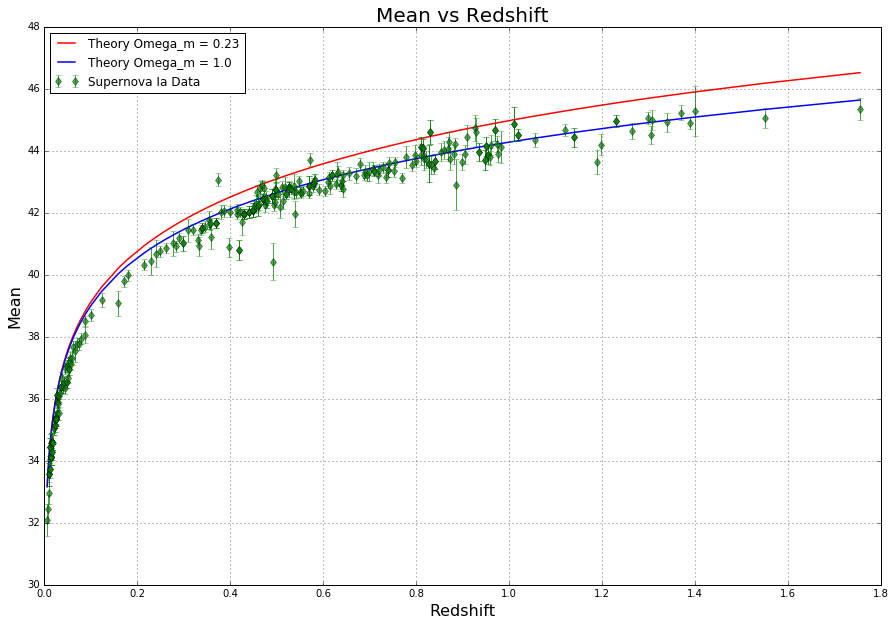

In [17]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
%matplotlib inline

z_data = np.genfromtxt('SN.dat', skip_header=1, usecols=(1))
mu_data = np.genfromtxt('SN.dat', skip_header=1, usecols=(2))
err_data = np.genfromtxt('SN.dat', skip_header=1, usecols=(3))

z = np.array(z_data)
mu = np.array(mu_data)
err = np.array(err_data)

z.sort()
for i in range(len(z)):
    for j in range(len(z)):
        if z_data[j] == z[i]:
            mu[i] = mu_data[j]
            err[i] = err_data[j]


OmegaM0 = 0.23
OmegaM1 = 1.0
h0 = 0.7
steps = len(z)


params0 = [h0, OmegaM0]
params1 = [h0, OmegaM1]

def f(z, params):
    h, OmegaM = params
    OmegaL = 1.0-OmegaM
    f = (3000.0/h)/(np.sqrt(OmegaM*np.power((1.0+z),3.0)+OmegaL))
    return f

def Dc(z, params):
    h, OmegaM = params
    Dc = []
    f_int = lambda z: f(z, params)
    for i in range(steps):
        intEz = integrate.quad(f_int,0.0,z[i])
        Dc.append(intEz[0])
    return Dc

def DL(z, params):
    h, OmegaM = params
    DL = (1.0+z)*Dc(z, params)
    return DL

def MU(z, params):
    h, OmegaM = params
    MU = []
    MU = 25.0 - 5.0*np.log10(h) + 5.0*np.log10(DL(z, params))
    return MU


plt.figure(figsize=(15,10))
plt.plot(z, MU(z, params0), 'r', linewidth=1.5, label='Theory Omega_m = 0.23')
plt.plot(z, MU(z, params1), 'b', linewidth=1.5, label='Theory Omega_m = 1.0')
plt.errorbar(z, mu, yerr=err, fmt='cd', color='g', alpha=0.7, label='Supernova Ia Data')
plt.legend(fontsize=12, loc=0)
plt.grid(True)
plt.xlabel('Redshift',fontsize=16)
plt.ylabel('Mean', fontsize=16)
plt.title('Mean vs Redshift', fontsize=20)
plt.show()

Omega = 1 seems to fit better than omega = 0.23

# 3 Estimating Parameters

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in log10


Solving for the optimal parameters results in h = 0.63 and omega_M = 0.318 with a reduced chi2 of 0.026


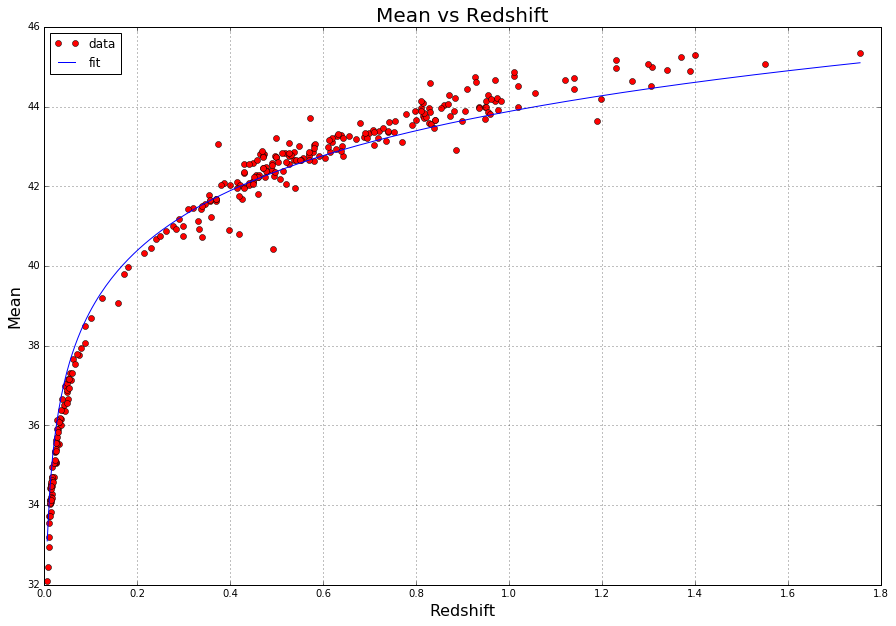

In [25]:
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

fitfunc = lambda p, x: 25.0-((5.0)*(np.log10(p[0])))+((5.0)*(np.log10(x)))
errfunc = lambda p, x, y: fitfunc(p, x) - y
p0 = [0.7, 100]
p1, success = optimize.leastsq(errfunc, p0[:], args=(z_data, mu_data))

time = np.linspace(z_data.min(), z_data.max(), 292)

plt.figure(figsize=(15,10))
plt.plot(z_data, mu_data, "ro", time, fitfunc(p1, time), "b-")
plt.title("Mean vs Redshift", fontsize=20)
plt.grid(True)
plt.xlabel("Redshift", fontsize=16)
plt.ylabel("Mean", fontsize=16)
plt.legend(('data', 'fit'), fontsize=12, loc=0)

import numpy as np

chi2=[]

for i in range(len(z_data)):
    chi2 = 0.0
    chi2 += np.power((mu_data[i]-fitfunc(p1, time)[i]),2.0)/np.power(sigma_data[i],2.0)

print 'Solving for the optimal parameters results in h = 0.63 and omega_M = 0.318 with a reduced chi2 of 0.026'

# MCMC

In [ ]:
import numpy as np
import emcee

def lnprob(x, ivar):
    return -0.5 * np.sum(ivar * x ** 2)

ndim, nwalkers = 10, 100
ivar = 1. / np.random.rand(ndim)
p0 = [np.random.rand(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[ivar])
sampler.run_mcmc(p0, 1000)

I don't know what to do from here, I don't what this array means or how to use it